# Analysis HPT

In [2]:
import csv
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import math

In [3]:
from sklearn.linear_model import LinearRegression
import numpy as np

In [22]:
df_m_init = pd.read_csv("results_init/m_init.csv")
df_aco = pd.read_csv("results_aco/aco.csv")
df_ga = pd.read_csv("results_ga/ga.csv")

In [5]:
df_m_init["starting-time"]

0      20221231:11:57:12
1      20221231:12:00:58
2      20221231:12:04:36
3      20221231:12:07:43
4      20221231:12:11:19
             ...        
780    20230102:11:30:24
781    20230102:11:33:57
782    20230102:11:37:20
783    20230102:11:41:09
784    20230102:11:41:09
Name: starting-time, Length: 785, dtype: object

In [29]:
df_ga[df_ga["iteration"] == 20]

,type,saw_policy,percentage_replaced,population_size,neighborhoods,tournament_k,random_k,termination_criterion,alpha,beta,gamma,delta,iteration,instance,starting-time
367,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.05,100,[trip_2_opt;remove_customer;add_customer;remov...,50,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:23:11
368,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.05,100,[trip_2_opt;remove_customer;add_customer;remov...,81,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:29:25
369,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.05,100,[trip_2_opt;remove_customer;add_customer;remov...,95,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:35:42
370,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.10,100,[trip_2_opt;remove_customer;add_customer;remov...,50,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:42:02
371,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.10,100,[trip_2_opt;remove_customer;add_customer;remov...,81,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:48:19
372,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.10,100,[trip_2_opt;remove_customer;add_customer;remov...,95,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:05:54:39
373,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.20,100,[trip_2_opt;remove_customer;add_customer;remov...,27,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:06:00:58
374,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.20,100,[trip_2_opt;remove_customer;add_customer;remov...,50,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:06:07:05
375,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.20,100,[trip_2_opt;remove_customer;add_customer;remov...,81,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:06:13:22
376,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0.20,100,[trip_2_opt;remove_customer;add_customer;remov...,95,5,400,0.5,-1.0,-0.5,0.5,20,rand_test_5,20230104:06:19:39


In [7]:
df_res = df_m_init[df_m_init["iteration"] == 12]

In [8]:
df_res

,type,saw_policy,termination_criterion,random_k,population_size,show_output,alpha,beta,gamma,delta,iteration,instance,starting-time
783,initialization,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0,5,100,False,0.5,-1.0,-0.5,0.5,12,rand_test_11,20230102:11:41:09
784,initialization,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),0,5,100,False,0.5,-1.0,-0.5,-0.5,12,rand_test_11,20230102:11:41:09


In [9]:
df_res_aco = df_aco[df_aco["iteration"] == 7]
df_res_aco

,type,saw_policy,population_size,random_k,alpha,beta,rho,p,local_information,min_max_ant_system,termination_criterion,iteration,instance,starting-time
441,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),50,5,1.0,1.0,0.24,0.25,objective_value,True,200,7,rand_test_15,20230103:08:29:10
442,algorithm,Constant-Weights(Gamma-1:3;Gamma-2:3;Gamma-3:3),100,5,1.0,1.0,0.24,0.50,objective_value,True,200,7,rand_test_15,20230103:08:29:10


In [10]:
time_list = list(df_m_init["starting-time"])

In [11]:
total_times = []

start_time = datetime.strptime(time_list[0], '%Y%m%d:%H:%M:%S')

for index in range(1,len(time_list)):
    item = time_list[index]
    item_time = datetime.strptime(item, '%Y%m%d:%H:%M:%S')
    total_times.append((item_time - start_time).total_seconds())
    

In [12]:
y = np.array(total_times)
x = np.array(list(range(len(time_list) - 1))).reshape((-1,1))

In [13]:
len(y)

784

In [14]:
x

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

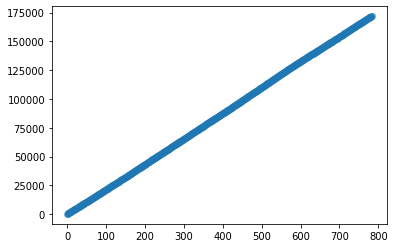

In [15]:
plt.scatter(x, y, alpha=0.5)
plt.show()

In [23]:
def plot_size_per_iteration(data, path, logarithmic = True):
    size_per_iteration = []
    log_size_per_iteration = []
    iterations = list(data["iteration"])
    iterations.sort() # Just to be safe
    iterations = set(iterations)

    for iteration in iterations:
        tmp_df = data[data["iteration"] == int(iteration)]
        size_per_iteration.append(tmp_df.shape[0])
        log_size_per_iteration.append(math.log(tmp_df.shape[0]))
    
    if logarithmic:
        plt.plot(list(iterations), log_size_per_iteration, '--bo')
        plt.ylabel("ln(size-per-iteration)")
    else:
        plt.plot(list(iterations), size_per_iteration, '--bo')
        plt.ylabel("size-per-iteration")
    plt.xlabel("iteration")
    
    plt.savefig(path)
    plt.show()

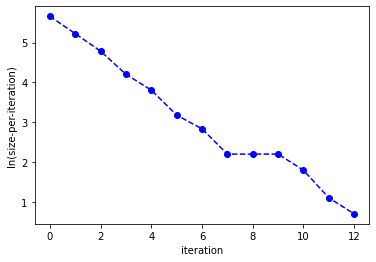

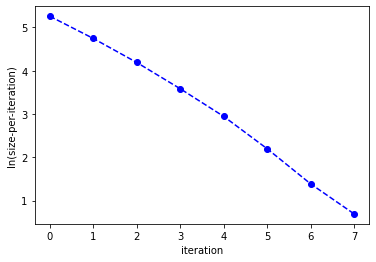

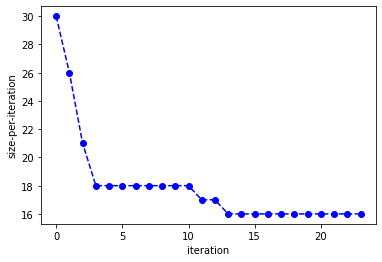

In [24]:
plot_size_per_iteration(df_m_init, "results_init/size.png")
plot_size_per_iteration(df_aco, "results_aco/size.png")
plot_size_per_iteration(df_ga, "results_ga/size.png", logarithmic = False)

In [26]:
def plot_instances_used(data, path):
    instances_used = []
    
    iterations = list(data["iteration"])
    iterations.sort() # Just to be safe
    iterations = set(iterations)
    
    print(iterations)
    
    for iteration in iterations:
        tmp_df = data[data["iteration"] == int(iteration)]
        string = list(tmp_df["instance"])[0]
        add = (string.split("_"))[2]
        

        instances_used.append(add)
    
    print(instances_used)
    instances_used, counts = np.unique(instances_used, return_counts=True)
    
    
    instances_used = list(instances_used)
    new_counts = []
    
    for index in range(len(instances_used)):
        item = instances_used[index]
        new_counts.append((int(item), counts[index]))
    
    new_counts.sort(key=lambda x:x[0])
    print(new_counts)
    
    labels = []
    counts = []
    
    for item in new_counts:
        labels.append(str(item[0]))
        counts.append(item[1])
        
    plt.bar(labels, counts, align='center', color='#0504aa', alpha = 0.7)
    plt.gca().set_xticks(labels)
    plt.savefig(path)
    plt.show()


{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}
['2', '6', '11', '8', '14', '9', '18', '15', '17', '1', '7', '11', '11']
[(1, 1), (2, 1), (6, 1), (7, 1), (8, 1), (9, 1), (11, 3), (14, 1), (15, 1), (17, 1), (18, 1)]


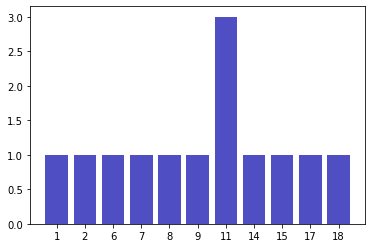

{0, 1, 2, 3, 4, 5, 6, 7}
['13', '13', '16', '11', '20', '13', '15', '15']
[(11, 1), (13, 3), (15, 2), (16, 1), (20, 1)]


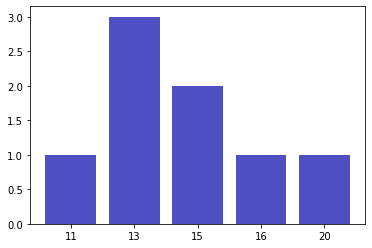

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23}
['12', '3', '1', '15', '7', '13', '4', '15', '14', '10', '3', '19', '18', '5', '4', '9', '12', '17', '19', '5', '5', '13', '9', '11']
[(1, 1), (3, 2), (4, 2), (5, 3), (7, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 2), (14, 1), (15, 2), (17, 1), (18, 1), (19, 2)]


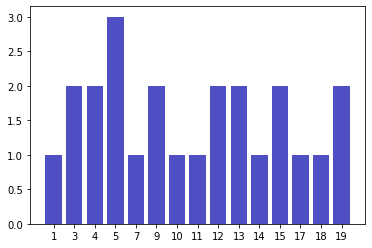

In [27]:
plot_instances_used(df_m_init, "results_init/hist.png")
plot_instances_used(df_aco, "results_aco/hist.png")
plot_instances_used(df_ga, "results_ga/hist.png")

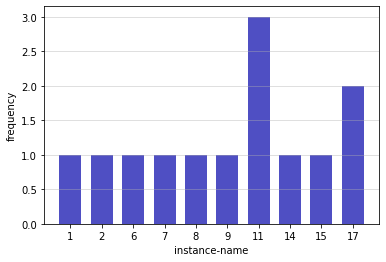

In [10]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [11]:
x_pred = np.array([474]).reshape((-1,1))
result = model.predict(x_pred)

In [12]:
(result[0]/60)/60 # Hours in total

28.768715356269006

In [13]:
((result[0] - y[len(y) - 1])/60)/60 # hours remaining

3.6039931340467835

# ACO

In [53]:
df_aco["starting-time"]

0     20221231:12:17:31
1     20221231:12:24:49
2     20221231:12:30:09
3     20221231:12:37:34
4     20221231:12:43:30
5     20221231:12:51:04
6     20221231:12:56:50
7     20221231:13:04:04
8     20221231:13:09:24
9     20221231:13:16:45
10    20221231:13:22:04
11    20221231:13:29:18
12    20221231:13:34:41
13    20221231:13:42:35
14    20221231:13:47:55
15    20221231:13:55:16
16    20221231:14:00:49
17    20221231:14:08:51
18    20221231:14:14:34
19    20221231:14:21:56
20    20221231:14:27:52
21    20221231:14:35:42
22    20221231:14:40:53
23    20221231:14:48:07
24    20221231:14:54:18
25    20221231:15:00:52
26    20221231:15:06:12
27    20221231:15:12:34
28    20221231:15:17:51
29    20221231:15:24:41
30    20221231:15:30:47
31    20221231:15:37:39
32    20221231:15:42:52
33    20221231:15:49:48
34    20221231:15:55:29
35    20221231:16:02:32
36    20221231:16:08:10
37    20221231:16:14:34
38    20221231:16:20:04
39    20221231:16:26:17
40    20221231:16:31:42
41    20221231:1

In [17]:
time_list = list(df_aco["starting-time"])

In [18]:
total_times = []

start_time = datetime.strptime(time_list[0], '%Y%m%d:%H:%M:%S')

for index in range(1,len(time_list)):
    item = time_list[index]
    item_time = datetime.strptime(item, '%Y%m%d:%H:%M:%S')
    total_times.append((item_time - start_time).total_seconds())
    

In [19]:
y = np.array(total_times)
x = np.array(list(range(len(time_list) - 1))).reshape((-1,1))

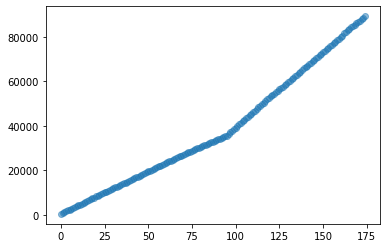

In [21]:
plt.scatter(x, y, alpha=0.5)
plt.show()

In [22]:
model = LinearRegression()
model.fit(x,y)

LinearRegression()

In [23]:
x_pred = np.array([192]).reshape((-1,1))
result = model.predict(x_pred)

In [24]:
(result[0]/60)/60 # Hours in total

25.4126890120416

In [25]:
((result[0] - y[len(y) - 1])/60)/60 # hours remaining

0.5943556787082667